# Sieve of Randall

## Introduction

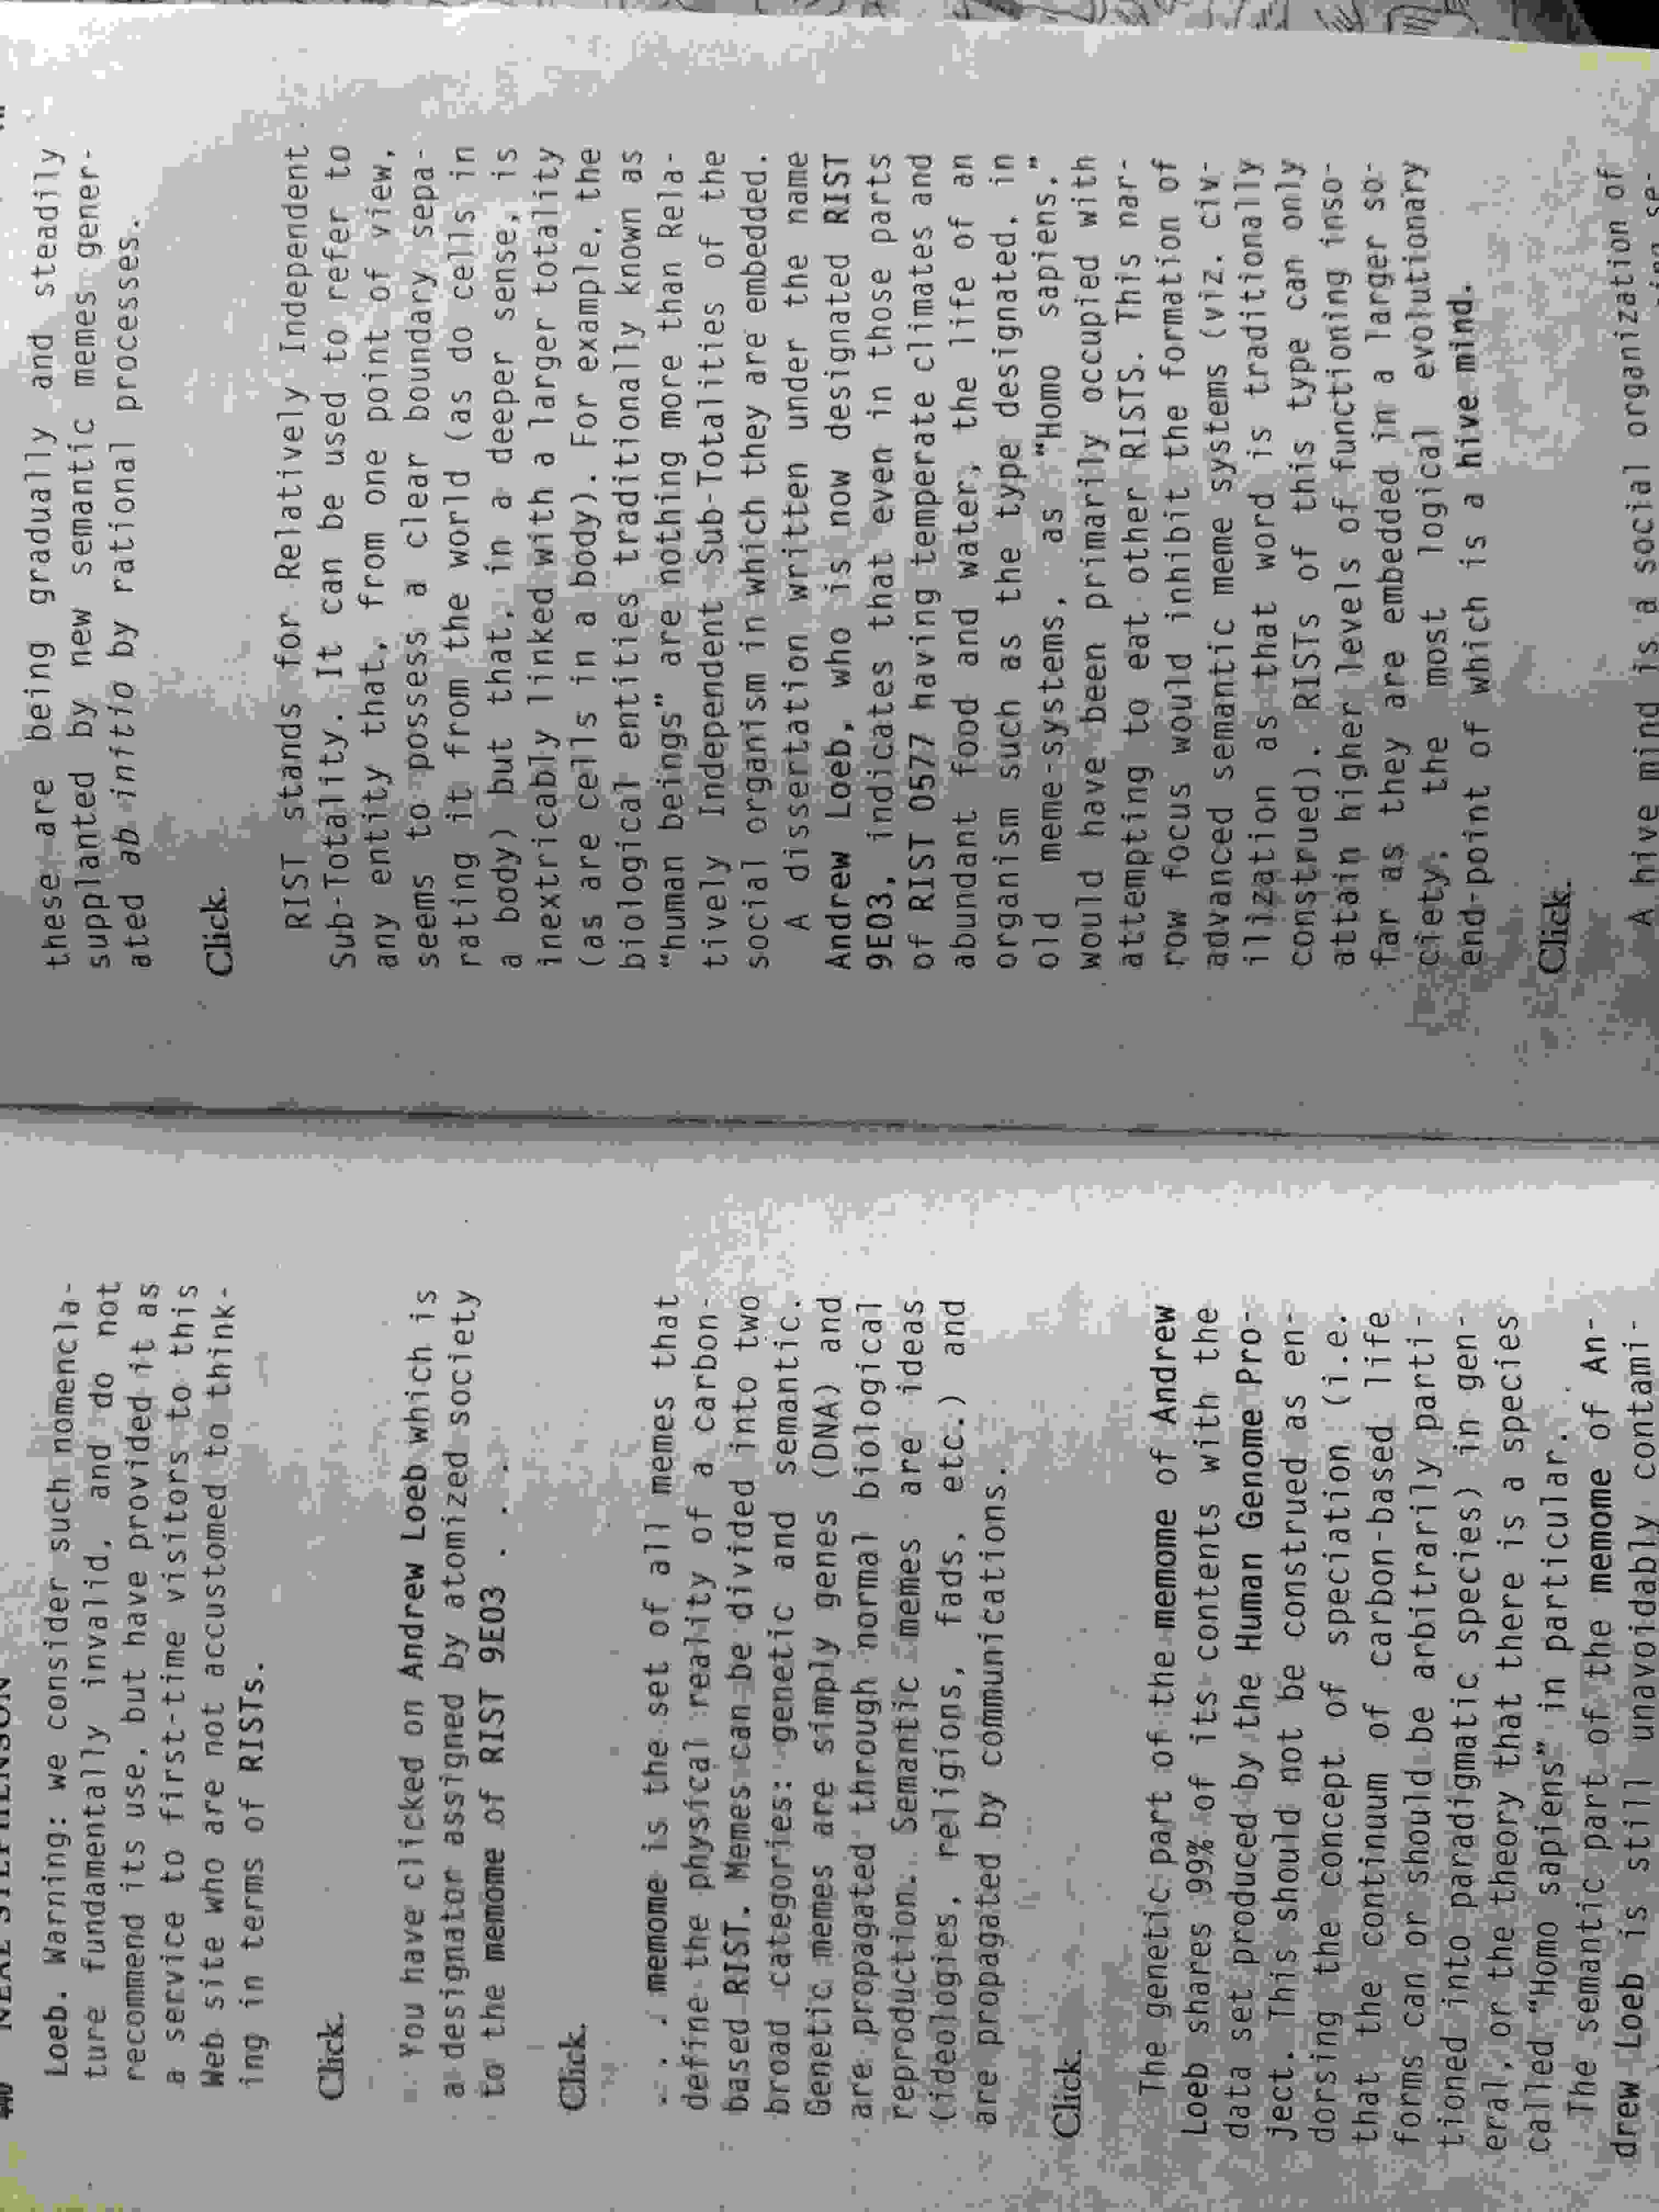

In [55]:
from IPython.display import Image
Image("./img/crypto.jpg")

## Abstract

Last time I spoke with Randall, he was quite interested in a particular type of machines that
initially were designed to solve a problem and while doing so they were catalyzing its own
construction. He was pretty convinced that, as long as enough energy was around, **all** solutions
to solvable problems can be found in that way. I couldn't find flaws in his logic, and we pursued an
exploration.

In fact, he pointed out that the machine will create (or better said, discover) new problems
on it’s way and solve them with the sole purpose of collecting and storing energy. And again,
he cleverly made a guess that different components of the machine will establish a symbiotic
relation to parallelize the resolution of the problems and to reuse previous solutions when
necessary.

That’s how the concept of RIST was born, which was the most natural way to study the behavior
of different parts of the machine over time. Something overlooked back then was the possibility
that the machine became aware of itself, in the sense that a RIST will develop enough
computing power to formulate a question about its nature of existence.

Randall once joked about that. “ZP! What if the machine now knows that something exists?
Is that a *bug*?”. And yes, consciousness was initially treated as a bug and it was used as
a stopping criteria for whatever problem was being solved.

But as a good friend of mine always says, a bug, it’s a feature. So we opened a new branch where
we let consciousness develop freely in the machine whenever it was possible.

Among other things, we found that the development of consciousness was quite different on
each iteration, depending on the initial problem. But regardless of that genesis trigger,
we found a set of problems that appeared over and over on every conscious instance of
the machine that we created. We didn’t probe it, but we had a good intuition that the
discovery of those problems is a necessary condition for consciousness to exist.

Since we were skipping our arts class at that time, we couldn’t think of a more creative name
than “Necessary Problems” for them. It was later changed to “Natural Problems” because no one
worked on a proof for that yet. Not even the [machine](https://www.youtube.com/watch?v=fn1R-5p_j5c) $\zeta$.

And here it is Randy, look at what you did !

## Prime Sieve Automata (PSA)

### Handcrafting the logic

Let's consider a language with an alphabet of "1" and "0" where natural numbers are expressed in the
base-2 numeral system. For example, 2 it's represented as "10" and 11 as "1011". The automata
we'll build is going to read the strings starting at the right most bit (least significant bit)
of the string.

In general, the following function converts a natural number into the binary
representation we'll work with.

In [56]:
def get_binary_input(number):
    binary = "{0:0128b}".format(number)
    stack = [c for c in binary[binary.find('1'):][::-1]]

    return stack

for i in range(1, 12):
    print("[+] binary stack for n =", i, get_binary_input(i))

[+] binary stack for n = 1 ['1']
[+] binary stack for n = 2 ['0', '1']
[+] binary stack for n = 3 ['1', '1']
[+] binary stack for n = 4 ['0', '0', '1']
[+] binary stack for n = 5 ['1', '0', '1']
[+] binary stack for n = 6 ['0', '1', '1']
[+] binary stack for n = 7 ['1', '1', '1']
[+] binary stack for n = 8 ['0', '0', '0', '1']
[+] binary stack for n = 9 ['1', '0', '0', '1']
[+] binary stack for n = 10 ['0', '1', '0', '1']
[+] binary stack for n = 11 ['1', '1', '0', '1']


Now let's build a finite automata which is going to accept binary strings of prime numbers until 11.
A straightforward way would be to create a single final state ($ ip_0 $) and connect the
sequence of ones and zeroes from the initial state ($ is_0 $) for each prime.

[+] the eleven prime sieve
states = {z2, is0, z8, z1, ip0, z7, z3, z0, z5, z4, z6} ; alphabet = {'1', '0'}
is0 (0) -> {z0}
is0 (1) -> {z2, z6, z4, z1}
z0 (1) -> {ip0}
z1 (1) -> {ip0}
z2 (0) -> {z3}
z3 (1) -> {ip0}
z4 (1) -> {z5}
z5 (1) -> {ip0}
z6 (1) -> {z7}
z7 (0) -> {z8}
z8 (1) -> {ip0}
initial = is0 ; final = {ip0}

[+] automata plotter


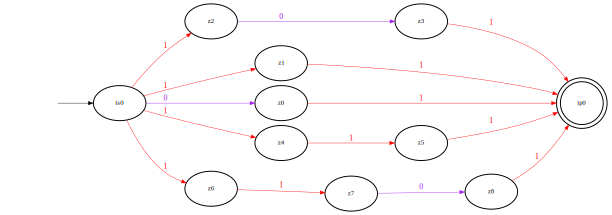

In [57]:
from zephod.finite import *

initial, final = State("is0"), State("ip0")

delta = FADelta()

# number 2
delta.add(initial, State("z0"), {"0"})
delta.add(State("z0"), final, {"1"})

# number 3
delta.add(initial, State("z1"), {"1"})
delta.add(State("z1"), final, {"1"})

# number 5
delta.add(initial, State("z2"), {"1"})
delta.add(State("z2"), State("z3"), {"0"})
delta.add(State("z3"), final, {"1"})

# number 7
delta.add(initial, State("z4"), {"1"})
delta.add(State("z4"), State("z5"), {"1"})
delta.add(State("z5"), final, {"1"})

# number 11
delta.add(initial, State("z6"), {"1"})
delta.add(State("z6"), State("z7"), {"1"})
delta.add(State("z7"), State("z8"), {"0"})
delta.add(State("z8"), final, {"1"})

eleven_sieve = FiniteAutomata(transition=delta, initial=initial, final={final})

print("[+] the eleven prime sieve")
print(eleven_sieve)

from utils.plotter import *

print("\n[+] automata plotter")

graphviz.Source(eleven_sieve.build_dot())

The resulting automata is a non deterministic (NFDA), since on the first state there are several
transitions with the same symbol ("1") going to several others.

We can use a prime sieve to verify that the automata works as expected.

In [58]:
from sympy import sieve

for i in range(2, 12):
    accepted = eleven_sieve.read(get_binary_input(i))
    if i in sieve:
        print("[+] checking prime number n =", i, "accepted =", accepted)
        assert accepted
    else:
        print("[+] checking composite number n =", i, "accepted =", accepted)
        assert not accepted

[+] checking prime number n = 2 accepted = True
[+] checking prime number n = 3 accepted = True
[+] checking composite number n = 4 accepted = False
[+] checking prime number n = 5 accepted = True
[+] checking composite number n = 6 accepted = False
[+] checking prime number n = 7 accepted = True
[+] checking composite number n = 8 accepted = False
[+] checking composite number n = 9 accepted = False
[+] checking composite number n = 10 accepted = False
[+] checking prime number n = 11 accepted = True


Given the construction method, this automata is performing a linear search into the
prime numbers that are encoded on its transition function. It will try each one of the 4 branches
that are coming out from $is_0$ until it gets to the final state, or until it rejects
the string for composite numbers.

You can also debug the evolution of the automata for a given string, along with the different paths
that is taking when is non deterministic.

In [59]:
eleven_sieve.debug(get_binary_input(11))

-------------------------------------------------------------------------------

initial (is0)         final {ip0}                                                                                       

[C0] 1 1 0 1               is0                           

-------------------------------------------------------------------------------
[C0] 1 1 0 1               [is0, 1(0)] to [z6, 1(1)]     
[C0] 1 1 0 1               [is0, 1(0)] to [z2, 1(1)]     
[C0] 1 1 0 1               [is0, 1(0)] to [z1, 1(1)]     
[C0] 1 1 0 1               [is0, 1(0)] to [z4, 1(1)]     
-------------------------------------------------------------------------------
[C0] 1 1 0 1               [z1, 1(1)] to [ip0, 0(2)]     
[C0] 1 1 0 1               [z4, 1(1)] to [z5, 0(2)]      
[C0] 1 1 0 1               [z6, 1(1)] to [z7, 0(2)]      
-------------------------------------------------------------------------------
[C0] 1 1 0 1               [z7, 0(2)] to [z8, 1(3)]      
----------------------------------

As a first step, we can convert this NFDA into a deterministic one, which is going to result in a
DFA where each state will have at most 2 transitions.


[+] deterministic FA eleven sieve


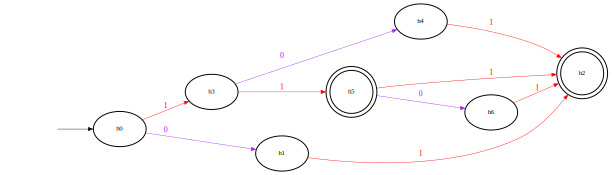

In [60]:
print("\n[+] deterministic FA eleven sieve")

deterministic_eleven_sieve = eleven_sieve.get_deterministic()
graphviz.Source(deterministic_eleven_sieve.build_dot())

Much better and cleaner. We can further minimize the automata to reduce the number of states.


[+] deterministic FA eleven sieve


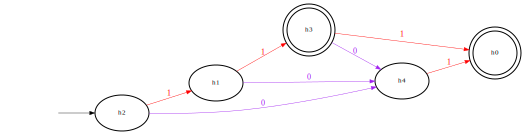

In [61]:
print("\n[+] deterministic FA eleven sieve")

minimal_eleven_sieve = deterministic_eleven_sieve.minimal()
graphviz.Source(minimal_eleven_sieve.build_dot())

In [62]:
for i in range(2, 12):
    accepted = minimal_eleven_sieve.read(get_binary_input(i))
    if i in sieve:
        print("[+] checking prime number (minimal DFA) n =", i, "accepted =", accepted)
        assert accepted
    else:
        print("[+] checking composite number (minimal DFA) n =", i, "accepted =", accepted)
        assert not accepted

[+] checking prime number (minimal DFA) n = 2 accepted = True
[+] checking prime number (minimal DFA) n = 3 accepted = True
[+] checking composite number (minimal DFA) n = 4 accepted = False
[+] checking prime number (minimal DFA) n = 5 accepted = True
[+] checking composite number (minimal DFA) n = 6 accepted = False
[+] checking prime number (minimal DFA) n = 7 accepted = True
[+] checking composite number (minimal DFA) n = 8 accepted = False
[+] checking composite number (minimal DFA) n = 9 accepted = False
[+] checking composite number (minimal DFA) n = 10 accepted = False
[+] checking prime number (minimal DFA) n = 11 accepted = True


It's also possible to get a grammar out of the FDA, which is going to generate the prime
numbers we encoded.

In [63]:
from utils.language.grammar import *

eleven_sieve_grammar = Grammar.build_from_finite_automata(minimal_eleven_sieve)

print("[+] eleven sieve grammar")
print(eleven_sieve_grammar)

print("\n[+] prime generation")
for each in eleven_sieve_grammar.enumerate(length=4):
    print("[+] number generated", int(each[::-1], 2))

[+] eleven sieve grammar
T = {'1', '0'} ; N = {'P', 'Q', 'R'}
S -> 1Q
S -> 0P
R -> 1
R -> 0P
Q -> 1
Q -> 1R
Q -> 0P
P -> 1

[+] prime generation
[+] number generated 2
[+] number generated 7
[+] number generated 11
[+] number generated 3
[+] number generated 5


### Moving it forward

What if we keep applying this process for larger numbers? In fact, we could keep reusing previous
minimized DFAs iteratively while adding new primes to its structure.

Let's do it for all natural numbers up to $2^7$. We can easily automate the construction of the
automata with the following methods using our external sieve to find prime numbers.


[+] seven bit NFDA  sieve


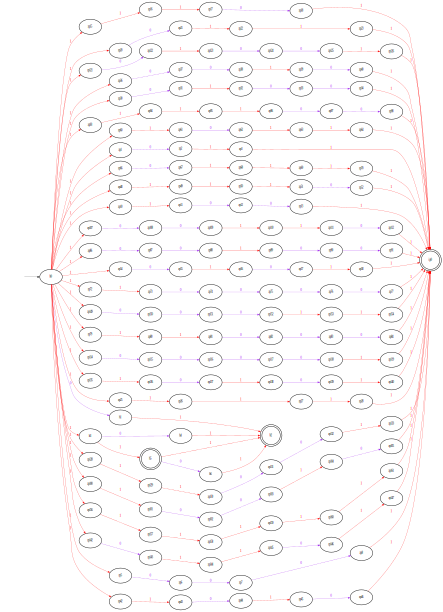

In [64]:
class PrimeBuilder:
    def __init__(self, final_state):
        self.counter = 0
        self.final_state = final_state

    def get_new_state(self):
        self.counter += 1
        return State("zp" + str(self.counter))

    def state_factorization(self, initial_state, transition, n):
        if n in sieve:
            stack, state = get_binary_input(n), initial_state
            for ic, b in enumerate(stack):
                current_state = self.get_new_state()

                if ic == 0:
                    transition.add(state, current_state, b)
                elif ic == len(stack) - 1:
                    transition.add(state, self.final_state, b)
                else:
                    transition.add(state, current_state, b)

                state = current_state

    def build(self, initial_state, transition, lower, higher):
        for lm in range(lower, higher):
            self.state_factorization(initial_state, transition, lm)

# get initial state from the previous automata
initial = deterministic_eleven_sieve.initial
final = deterministic_eleven_sieve.final.copy()

prime_state = State("ip0")
final.add(prime_state)

delta = copy.deepcopy(deterministic_eleven_sieve.transition)

prime_builder = PrimeBuilder(final_state=prime_state)

# add number from 11 to 64 (7 bits)
prime_builder.build(initial, delta, 12, 129)

# build the new automata with the additional primes
nfda_seven_sieve = FiniteAutomata(transition=delta, initial=initial, final=final)

print("\n[+] seven bit NFDA  sieve")

graphviz.Source(nfda_seven_sieve.build_dot())

Now we can apply a NFDA to an DFA conversion, followed by a minimization.


[+] deterministic DFA 7 bits sieve


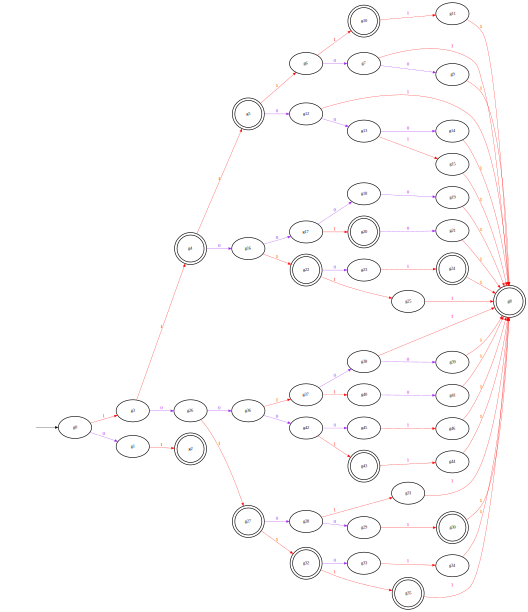

In [65]:
print("\n[+] deterministic DFA 7 bits sieve")

dfa_seven_sieve = nfda_seven_sieve.get_deterministic()
graphviz.Source(dfa_seven_sieve.build_dot())


[+] minimal DFA 7 bits sieve


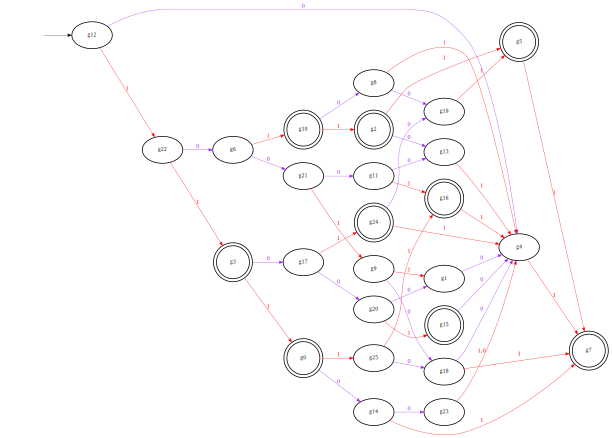

In [66]:
print("\n[+] minimal DFA 7 bits sieve")

minimal_seven_sieve = dfa_seven_sieve.minimal()
graphviz.Source(minimal_seven_sieve.build_dot())

Let's do some testing and get a grammar to generate 7 $bits$ primes to make sure everything is good.

In [67]:
seven_bits_sieve_grammar = Grammar.build_from_finite_automata(minimal_seven_sieve)

print("\n[+] prime generation")
for each in seven_bits_sieve_grammar.enumerate(length=7):
    print(int(each[::-1], 2), end=' ')
print()

for i in range(2, 2**7):
    accepted = minimal_seven_sieve.read(get_binary_input(i))
    if i in sieve:
        assert accepted
    else:
        assert not accepted


[+] prime generation
29 76 35 97 19 95 28 124 67 10 71 66 51 110 50 12 38 58 57 53 56 90 80 84 108 59 64 93 106 113 52 88 18 77 47 109 92 49 43 62 83 31 41 23 6 122 30 102 94 5 2 65 11 75 89 82 42 100 85 117 111 70 17 73 125 34 7 103 32 116 33 112 126 48 22 39 72 40 4 61 78 91 96 81 44 13 63 101 74 16 60 45 37 107 114 123 46 36 127 3 79 115 


Indeed it is. We can compare the number of states and transitions for each automata.

In [68]:
def automata_info(name, fa: Automata):
    print("[+]", name, "states =", len(fa.transition.states))
    print("[+]", name, "final states =", len(fa.final))
    delta_function = fa.transition.transitions
    transitions = sum([len(delta_function[state]) for state in delta_function])
    print("[+]", name, "transitions =", transitions)
    print()

automata_info("NDFA 7 bits sieve", nfda_seven_sieve)
automata_info("DFA 7 bits sieve", dfa_seven_sieve)
automata_info("minimal DFA 7 bits sieve", minimal_seven_sieve)

[+] NDFA 7 bits sieve states = 144
[+] NDFA 7 bits sieve final states = 3
[+] NDFA 7 bits sieve transitions = 171

[+] DFA 7 bits sieve states = 47
[+] DFA 7 bits sieve final states = 13
[+] DFA 7 bits sieve transitions = 64

[+] minimal DFA 7 bits sieve states = 26
[+] minimal DFA 7 bits sieve final states = 9
[+] minimal DFA 7 bits sieve transitions = 43



The NDFA-DFA conversion / minimization process is working as a compression mechanism
to encode the prime numbers up to a given $n \in \mathbb{N}$.

Regardless of how amusing might be to encode primes in this way, it would be interesting
to see how efficient the encoding is. Let's push it forward and create a sieve up to $2^{16}$ for that.
The NDFA-DFA / minimization should be done in batches for a better scaling of the algorithms.

Before that, I just realized that it's a bit annoying to write "NDFA-DFA / minimization process" each
time I have to reference it. And is not a very descriptive name. From now on, I'll call it
"the learning process", which is an universal process where the number of states of the automata
is minimized without losing its correctness and the transitions are reorganized to support
this new structure.

The behavior has some similarities to neural networks, with the difference that the transitions (i.e
connections) of the automata might drastically change on each learning step. It's more evidence on
how powerful this type of architectures is when learning patterns in data.

As an example, take a look at what happens with even numbers, those with the least significant digit
equal to 0. They go through a state such that, if the next digit is not 1, the string is not accepted. In
other words, the automata learned that even numbers $>2$ are not primes, and is discarding them after
2 transitions. This is an emergent behavior which also reminds me to some characteristic
of decision trees.

Anyways.

In [69]:
import pickle
import os.path

def fda_batch_update(max_value = 2**12):
    # primes per batch
    batch_size = 750

    initial_state = State("ie0")
    final_state = State("ip0")

    builder = PrimeBuilder(final_state=final_state)

    transition = FADelta()
    final_set = {prime_state}

    runs = int(max_value / batch_size) + 1
    print("[+] total runs", runs)

    for j in range(0, runs):
        lower = j * batch_size + 1
        limit = min((j + 1) * batch_size, max_value + 1)

        print("[+] running batch", j, "between", lower, limit, "...")
        builder.build(initial_state, transition, lower, limit)

        # get NDFA and minimize it
        nfsm = FiniteAutomata(transition=transition, initial=initial_state, final=final_set)
        minimal = nfsm.minimal()

        # update final states
        final_set = minimal.final
        final_set.add(prime_state)

        # recover initial state
        initial_state = minimal.initial

        # get previous transition function
        transition = minimal.transition

    return minimal

sixteen_sieve_file = "sixteen_sieve_minimal.pkl"
max_sieve_value = 2**16

if os.path.isfile(sixteen_sieve_file):
    print("[+] loading", sixteen_sieve_file)
    sixteen_sieve = pickle.load(open(sixteen_sieve_file, "rb"))

else:
    sixteen_sieve = fda_batch_update(max_value=max_sieve_value)
    pickle.dump(sixteen_sieve, open(sixteen_sieve_file, "wb"))

automata_info("minimal DFA 16 bits sieve", sixteen_sieve)

for i in range(2, max_sieve_value):
    accepted = sixteen_sieve.read(get_binary_input(i))
    if i in sieve:
        assert accepted
    else:
        assert not accepted

[+] loading sixteen_sieve_minimal.pkl
[+] minimal DFA 16 bits sieve states = 3084
[+] minimal DFA 16 bits sieve final states = 516
[+] minimal DFA 16 bits sieve transitions = 5966



In [70]:
max_sieve_value = 2**13
sieve_13_bits = fda_batch_update(max_value=max_sieve_value)
automata_info("minimal DFA 13 bits sieve", sieve_13_bits)

for i in range(2, max_sieve_value):
    accepted = sixteen_sieve.read(get_binary_input(i))
    if i in sieve:
        assert accepted
    else:
        assert not accepted

AutomataPlotter.tikz(sieve_13_bits, filename="sieve_13_bits", output="./img/")

[+] total runs 11
[+] running batch 0 between 1 750 ...
[+] running batch 1 between 751 1500 ...
[+] running batch 2 between 1501 2250 ...
[+] running batch 3 between 2251 3000 ...
[+] running batch 4 between 3001 3750 ...
[+] running batch 5 between 3751 4500 ...
[+] running batch 6 between 4501 5250 ...
[+] running batch 7 between 5251 6000 ...
[+] running batch 8 between 6001 6750 ...
[+] running batch 9 between 6751 7500 ...
[+] running batch 10 between 7501 8193 ...
[+] minimal DFA 13 bits sieve states = 559
[+] minimal DFA 13 bits sieve final states = 119
[+] minimal DFA 13 bits sieve transitions = 1062



/home/larry/practicas/pyauto/venv/lib/python3.6/site-packages/PIL/Image.py:2835: DecompressionBombWarning: Image size (132880806 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


So for the 16 $bits$ sieve we got around $3000$ states and almost double of transitions. As a reference, the
amount of primes up to $2^16$ is $6542$.

How should we encode the automata to use the less space possible? First of all, we need to encode which of the
states are final, so that would require a 3000 $bits$ array, where we mark with 1 the final states and with 0 the
rest and additional 3000 $bits$ to indicate how much nodes actually are.

What we can do is to index each node and store a binary array $[s_{00}s_{01},\:s_{10}s_{11},\:... ,\:s_{n0}s_{n1}]$
where $s_{i0}$ is the index of the left child of $s_i$ and $s_{i1}$ is the right child.

Since (in this case) we have $3000$ states, we'll need $12$ $bits$ to encode each index, and since each state has
at most $2$ children, we would need $24 \times 3000 \; bits + 6000 \; bits = 78000\;bits$ (give or take).

This could be improved, since some states might have multiple predecessors. Something
like [Huffman Coding](https://en.wikipedia.org/wiki/Huffman_coding) can be useful to save some space. The nodes
which have more than one predecessors will be encoded with the shortest binary strings.

For the sake of completeness, let's write a Huffman encoding algorithm for the automata to evaluate it for
this case.

In [71]:
import networkx
import queue
import sys

from networkx.drawing.nx_agraph import graphviz_layout

sys.setrecursionlimit(10000)

# this function will make an array with states and its children (i.e. transition function)
def get_serialized_array_from_fda(fda: FiniteAutomata):
    def get_state_type(s):
        if s in fda.final:
            return "final"
        elif s == fda.initial:
            return "initial"
        else:
            return "none"

    transition_array = list()

    for state in fda.g.nodes:
        assert len(fda.g[state]) <= 2
        children = fda.g[state]
        symbol_transition = {children[s]["symbol"][0]:s for s in children}
        transition_array += [str(symbol_transition[sym]) if sym in symbol_transition else "null" for sym in ['0', '1'] ]

    return transition_array

print("[+] transition array for 7 bits sieve", get_serialized_array_from_fda(minimal_seven_sieve))

[+] transition array for 7 bits sieve ['g4', 'g22', 'g13', 'g5', 'g23', 'g7', 'null', 'g7', 'null', 'g4', 'g13', 'g16', 'g4', 'null', 'g21', 'g10', 'null', 'g4', 'g8', 'g2', 'g18', 'g1', 'g17', 'g0', 'null', 'g7', 'null', 'g5', 'g14', 'g25', 'g19', 'g4', 'g20', 'g24', 'g11', 'g9', 'g4', 'g7', 'null', 'null', 'g18', 'g16', 'g4', 'null', 'g6', 'g3', 'g1', 'g15', 'null', 'g4', 'g19', 'g4']


The serialized format is as follow : $(s_{i0}, s_{i1})$, where one of the states could be nulled. Now we can
transform this serialized automata into a Huffman coding scheme.

In [72]:
def automata_huffman_tree(transition_array, priority_queue=None, tree=None):
    def is_single_state(s):
        return '|' not in s

    if priority_queue is None:
        priority_queue = queue.PriorityQueue()
        [priority_queue.put((c, s)) for s, c in {s: transition_array.count(s) for s in transition_array}.items()]

        tree = networkx.DiGraph()

    if priority_queue.qsize() > 1:
        left = priority_queue.get()
        right = priority_queue.get()

        # parent
        parent = left[1] + "|" + right[1]
        tree.add_node(parent)

        # children
        if is_single_state(left[1]):
            tree.add_node(left[1], state=left[1])
        else:
            tree.add_node(left[1])

        if is_single_state(right[1]):
            tree.add_node(right[1], state=right[1])
        else:
            tree.add_node(right[1])

        ## add symbols
        tree.add_edge(parent, left[1], symbol='0')
        tree.add_edge(parent, right[1], symbol='1')

        priority_queue.put((left[0] + right[0], parent))
        return automata_huffman_tree(transition_array, priority_queue, tree)

    else:
        return tree

def plot_tree(tree):
    edges_labels = networkx.get_edge_attributes(tree, "symbol")
    node_labels = networkx.get_node_attributes(tree, "state")
    pos = graphviz_layout(tree, prog="dot")

    networkx.draw(tree, pos=pos, labels=node_labels)
    networkx.draw_networkx_edge_labels(tree, pos, edges_labels)

def get_root_node(tree):
    return next(iter(networkx.topological_sort(tree)))

def automata_huffman_code(huffman_tree, node=None, huffman_code=None, stack=None):
    is_root = False

    if huffman_code is None:
        node = get_root_node(huffman_tree)
        huffman_code = dict()
        stack = list()

        is_root = True

    children = huffman_tree[node]
    if len(children):
        for child in children:
            child_stack = stack + [children[child]["symbol"]]
            automata_huffman_code(huffman_tree, child, huffman_code, child_stack)

    if "state" in huffman_tree.nodes[node]:
        huffman_code[huffman_tree.nodes[node]["state"]] = ''.join(stack)

    if is_root:
        return huffman_code

sixteen_serialized_array = get_serialized_array_from_fda(sixteen_sieve)
sixteen_sieve_huffman_tree = automata_huffman_tree(sixteen_serialized_array)
huffman_code_sixteen_sieve = automata_huffman_code(sixteen_sieve_huffman_tree)

binary_serialization = ''.join([huffman_code_sixteen_sieve[s] for s in sixteen_serialized_array])
print("[+] compressed binary string (Huffman)", len(binary_serialization) + 6000, "bits")

[+] compressed binary string (Huffman) 68782 bits


There is no much gain as expected, since most of the nodes have only 1 predecessor and very few have a high
frequency in the serialized string. In fact, this is almost like encoding primes as a big binary string and
tagging prime numbers with "1" digits and composites with "0". For that case we would have $65536$ $bits$
and can be further improved by half eliminating even numbers (and a bit more taking out multiples
of higher primes). But as we'll see in a while, having the primes encoded in a graph has the advantage that we can
work with simple binary operations for different purposes at the same time we transverse it.

My guess is that this encoding can be improved using a graph transversal pattern by which
state duplication can be avoided by exploiting the binary-tree-like structure the graph has in some of its
parts. Maybe something to revisit later.

## On The Search of Autonomy

As you might noted, we have been using an external sieve to enumerate primes and use it as a feed to the
construction of the automata. That means the building process is not self-contained and will have the same
limitations than the sieve we are using.

But this is not strictly necessary, because given a $PSA(n)$ that encodes the primes up to $n$ within
its structure, already has all the information needed to determine if $n + 1$ is a prime number or not.
Even more, the $PSA(n)$ can be used as a primality test for all natural numbers between $n$ and $n^2$.

And this open room for parallelization, since several automatas can be built in parallel for numbers
between $n$ and $n^2$ using the $PSA(n)$, and eventually merge all of them as part of
the learning process to obtain $PSA(n^2)$. This process can go on forever.

What we need to find is al algorithm that, given a binary representation of a natural number $m$ within
$n$ and $n^2$, it should find if there is a prime factor within the $PSA(n)$. If not, $m$ is a prime
and additional states and transitions should be added to $PSA(n)$ to incorporate it.

If natural numbers were molecules, prime numbers are atoms. In the same way that different
combinations of atoms give rise to a plethora of molecules, every natural number can be written as a
product of prime numbers.

The integration of a new prime to the structure of a $PSA$ is analogous to the incorporation of
a new atom in a biological machine. New connections (molecules) can be made, which are going to increase
the number of states (configurations) in the [machine](https://www.youtube.com/watch?v=aDaOgu2CQtI).

### Primality test

A possible strategy would be to transverse the graph using a breadth-first search to iterate through all
nodes that are a final state. The path to those nodes are the binary representation of a prime number and
we need to check if the input binary string ($n$) is divisible by any of them. If not, and we checked for
all primes smaller than $\sqrt n$, then $n$ is prime.

Since is a breadth-first search we'll perform the search starting with the smallest primes first. In this
way, we'll discard multiples of 2 and 3 and 5 pretty quickly.

Given two natural numbers $n$ and $m$ we would like to know if $n$ is divisible by $m$. In other
words, we should check whether $n \equiv 0 \; mod\;m$ or not. The following driver takes a $PSA(n)$
and uses it as a primality test and dynamically encodes new primes on it between a given range. The driver
if only doing additions, modulus and power by 2 operations and uses a queue and a set.

In [73]:
class PrimeSieve:
    def __init__(self, fda, n):
        # PSA(n)
        self.automata = fda
        self.n = n

class QueueState:
    def __init__(self, power, prime, state):
        self.power, self.prime, self.state = power, prime, state

class DriverBuilder:
    def __init__(self, primes):
        # automata states
        self.counter = 0
        self.initial_state = State("is0")
        self.final_state = State("ip0")

        # prime numbers
        self.primes = primes

    def get_new_state(self):
        self.counter += 1
        return State("zp" + str(self.counter))

    def state_factorization(self, transition, prime):
        stack, state = get_binary_input(prime), self.initial_state
        for ic, b in enumerate(stack):
            current_state = self.get_new_state()

            if ic == 0:
                transition.add(state, current_state, b)
            elif ic == len(stack) - 1:
                transition.add(state, self.final_state, b)
            else:
                transition.add(state, current_state, b)

            state = current_state

    def build(self):
        transition = FADelta()

        for p in self.primes:
            self.state_factorization(transition, p)

        return FiniteAutomata(initial=self.initial_state, final={self.final_state},
                              transition=transition).minimal()

class PrimeSieveDriver:
    def __init__(self, psa: PrimeSieve, low, high):
        # PSA(n)
        self.psa = psa

        # limits
        self.low = low
        self.high = high

        # final set of primes numbers (initially all numbers are here, and composite are removed)
        self.primes = set(range(low, high + 1))

        # FDA
        self.fda = None

    def run(self):
        # initialize queue
        node_queue = queue.Queue()
        node_queue.put(QueueState(power=0, prime=0, state=self.psa.automata.initial))

        # prime and current power
        while node_queue.qsize():
            # get node
            queue_state = node_queue.get()

            # check if we are in a final state
            if queue_state.state in self.psa.automata.final:
                # this is a prime number
                for p in filter(lambda m: m in self.primes, range(self.low, self.high + 1)):
                    if p % queue_state.prime == 0:
                        self.primes.remove(p)

            # get branches
            branches = self.psa.automata.g[queue_state.state]
            children = {s:branches[s]["symbol"][0] for s in branches}

            for child in children:
                # get digit
                digit = int(children[child])

                # get current values
                power, prime = queue_state.power, queue_state.prime

                # visit new child
                if digit:
                    node_queue.put(QueueState(power=power + 1, prime=2**power + prime, state=child))
                else:
                    node_queue.put(QueueState(power=power + 1, prime=prime, state=child))


        builder = DriverBuilder(primes=self.primes)
        self.fda = builder.build()

def merge_automatas(one, other):
    merged_delta = copy.deepcopy(one.transition)
    base = one.transition.max_state().number + 1

    other_delta = other.transition
    final_states = one.final
    for state in other_delta.transitions:
        for transition in other_delta.transitions[state]:
            source, target = transition.source, transition.target

            # propagate transition
            new_transition = copy.deepcopy(transition)
            new_transition.source = State(source.prefix + str(source.number + base))
            new_transition.target = State(target.prefix + str(target.number + base))

            # get final states
            if source in other.final:
                final_states.add(new_transition.source)

            if target in other.final:
                final_states.add(new_transition.target)

            # special case for the initial transition
            if state == other.initial:
                new_transition.source = one.initial

            merged_delta.add_transition(new_transition)

    return FiniteAutomata(initial=one.initial, final=final_states, transition=merged_delta)

As an example easy to visualize, let's use the driver using the $PSA(n=11)$ we built before to obtain the set
of primes between 12 and 121.

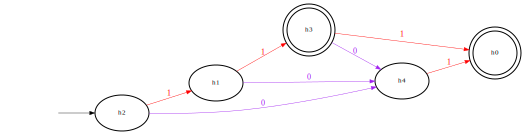

In [74]:
graphviz.Source(minimal_eleven_sieve.build_dot())

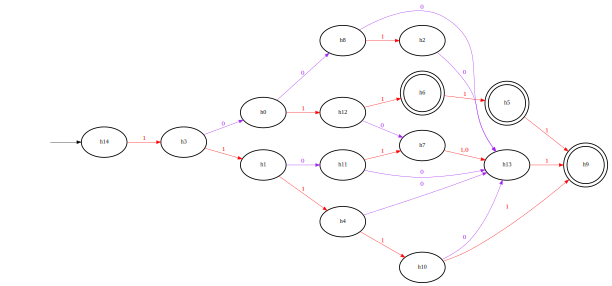

In [75]:
initial_sieve = PrimeSieve(fda=minimal_eleven_sieve, n=11)

prime_sieve_a = PrimeSieveDriver(initial_sieve, 12, 66)
prime_sieve_b = PrimeSieveDriver(initial_sieve, 67, 121)

prime_sieve_a.run()
prime_sieve_b.run()

graphviz.Source(prime_sieve_a.fda.build_dot())

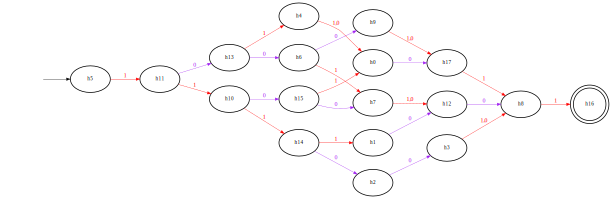

In [76]:
graphviz.Source(prime_sieve_b.fda.build_dot())

As is shown below, the automata is a NDFA since there are 2 transitions with the same symbol at the initial state.
Before applying a learning step on it, we should check it actually encodes all primes between 12 and 121.

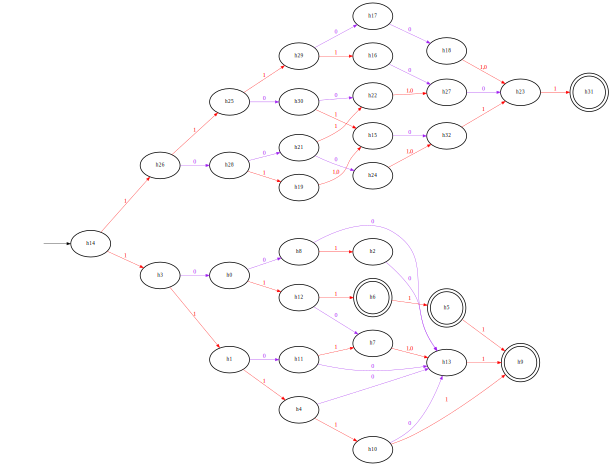

In [77]:
merged_prime_sieve_ab = merge_automatas(prime_sieve_a.fda, prime_sieve_b.fda)

graphviz.Source(merged_prime_sieve_ab.build_dot())

In [78]:
for i in range(12, 121):
    accepted = merged_prime_sieve_ab.read(get_binary_input(i))
    if i in sieve:
        assert accepted
    else:
        assert not accepted

Finally we can apply a learning step into the merged automata from above, and merge it to the initial $PSA(n)$
and we obtain the following NDFA.

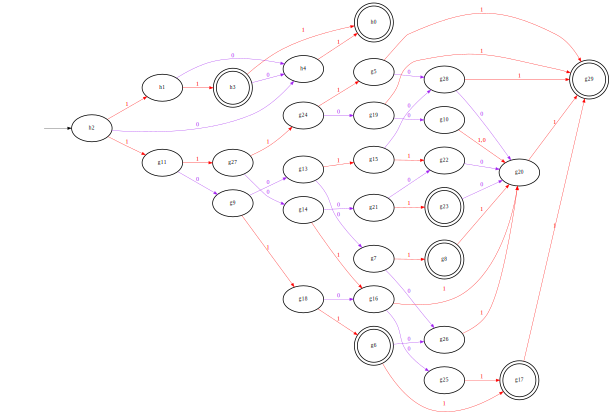

In [79]:
nfda_prime_sieve_121 = merge_automatas(minimal_eleven_sieve, merged_prime_sieve_ab.minimal())

graphviz.Source(nfda_prime_sieve_121.build_dot())

We can further minimize it, and get the minimal prime sieve for primes up to 121 (which is identical to the
$7$ $bits$ sieve we obtained before).

[+] PSA(121) states = 26
[+] PSA(121) final states = 9
[+] PSA(121) transitions = 43

[+] PSA(128) states = 26
[+] PSA(128) final states = 9
[+] PSA(128) transitions = 43



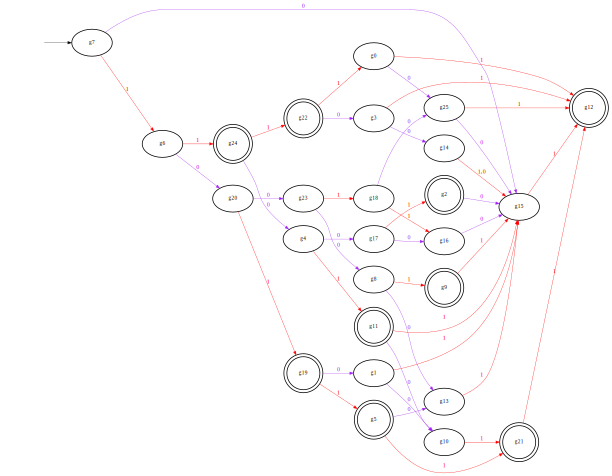

In [80]:
minimal_prime_sieve_121 = nfda_prime_sieve_121.minimal()

for i in range(2, 121):
    accepted = minimal_prime_sieve_121.read(get_binary_input(i))
    if i in sieve:
        assert accepted
    else:
        assert not accepted

automata_info("PSA(121)", minimal_prime_sieve_121)
automata_info("PSA(128)", minimal_prime_sieve_121)

graphviz.Source(minimal_prime_sieve_121.build_dot())
